In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

np.random.seed(123)
torch.manual_seed(123)

# Use some real data - Jiang et al

In [2]:
x = torch.from_numpy(
    np.load("../hydro-interpretive-dl/jiang_et_al_xtrain.npy")
).float()
y = torch.from_numpy(
    np.load("../hydro-interpretive-dl/jiang_et_al_ytrain.npy")
).float()

# Just use the first 100 examples of 180-day sequences
x = x[:100]
y = y[:100]

x.shape, y.shape

(torch.Size([100, 180, 2]), torch.Size([100, 1]))

# Define a simple model

In [3]:
class LSTM(torch.nn.Module):
    
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = torch.nn.LSTM(x.shape[2], 16, batch_first = True)
        self.fc = torch.nn.Linear(16, 1)
        
    def forward(self, x):
        x, (h, c) = self.lstm(x)
        x = x[:, -1, :] # only use the last output of the lstm
        x = self.fc(x)
        return(x)

# Make it
model = LSTM()

In [4]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

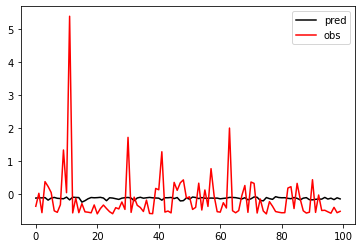

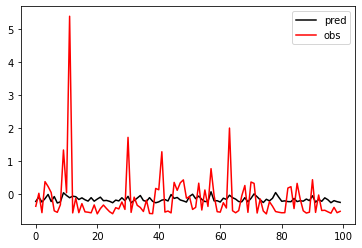

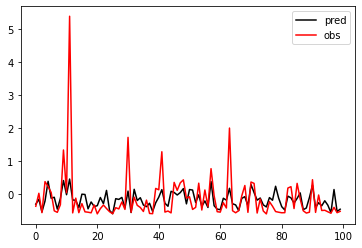

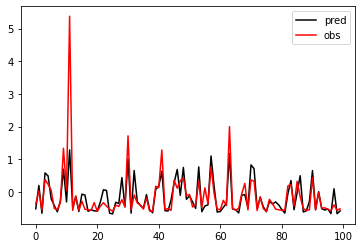

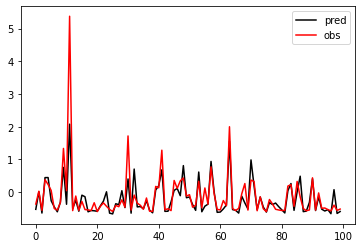

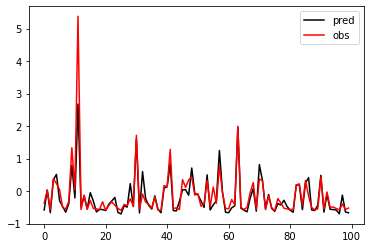

In [5]:
for i in range(200):
    out = model(x)
    loss = loss_fn(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 40 == 0 or i == 0:
        plt.plot(out.detach(), color = 'black', label = 'pred')
        plt.plot(y, color = 'red', label = 'obs')
        plt.legend()
        plt.show()
        plt.pause(0.001)

# Apply XAI

In [6]:
import shap

In [7]:
explainer = shap.GradientExplainer(model, x)

In [8]:
shap_values = explainer.shap_values(x)

### Explore visualization options

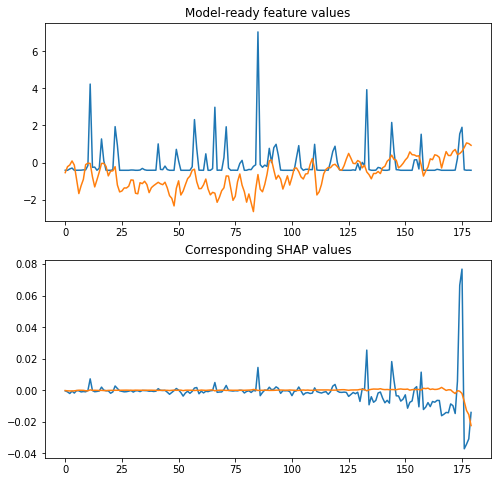

In [9]:
fig, ax = plt.subplots(2, 1, figsize = (8, 8))
# plots from the first 180-day sequence
ax[0].plot(x[0, :])
ax[0].set_title('Model-ready feature values')
ax[1].plot(shap_values[0, :])
ax[1].set_title('Corresponding SHAP values');